## Importing required modules

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import scipy.optimize
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


## Writing code for the functions

### Functions used:
(All the functions belong in the same class called "`simulation`", which will be invoked in the driver code.)
- `__init__`
- `set_position`
- `set_momenta_rest`
- `set_mass`
- `calc_forces`
- `calc_pe_using`
- `pdbc`
- `plot_configuration`
- `minimise_force`


In [25]:
class simulation: 
    # class method to run a simulation of identical LJ particles
    def __init__(self, number_of_parts=16):
      #create arrays of positions, momenta, forces
      #size  = (number_of_parts,3)
      self.number_of_parts=number_of_parts
      #make everything 0 initially
      self.mass=zeros([number_of_parts, 1])
      #equating epsilon, dimension, and sigma values all to 1
      self.dimension=2
      self.epsilon=1
      self.sigma=1

      #populating the following vectors with 0
      self.positions=zeros([number_of_parts, self.dimension])
      self.momenta=zeros([number_of_parts, self.dimension])
      self.forces=zeros([number_of_parts, self.dimension])

    

    def set_position(self, cubeSide):
        '''set the positions of the particles, randmly inside the cube'''
        self.positions = random.rand(self.number_of_parts, self.dimension)*cubeSide
            
    def set_momenta_rest(self):
        '''setting the momentun of all particles to zero, i.e at rest'''
        self.momenta = zeros([self.number_of_parts, self.dimension])
    def set_mass(self,m):
        ''' all masses will be made the same, here the value = m'''
        for i in range(self.number_of_parts):
            self.mass[i] = m   
    def calc_forces(self,cubeSide):
        '''array positions determine the current positions, wherein we calculate the euler forces
        due to LJ interactions amongst them'''
        #loop twice with the same condition, range = number of parts
        for i in range(self.number_of_parts):
            for j in range(self.number_of_parts):
                #populate the force array with zeroes
                F_ij = zeros(self.dimension)
                #call the pbdc function on the r_vector
                r_vec = self.pdbc(cubeSide, self.positions[i], self.positions[j])
                #r_vec = self.pos_vec[i] - self.pos_vec[j]
                r_mag = la.norm(r_vec)  #magnitude of relative position vector b/w particles i, j
                if i != j:
                    #using the formula for force required
                    F_ij = 24*self.epsilon*((2*(self.sigma**12))/(r_mag**14) - ((self.sigma**6)/(r_mag**8)))*r_vec
                self.forces[i] += F_ij


       

    def calc_pe_using(self, positions,cubeSide):
        '''calculate the current total Potential energy of the system, helper function'''
        #name space is gloabl, so np. is removed 
        positions = positions.reshape(self.number_of_parts, self.dimension)
        self.positions = positions
        total_pot = 0
        
        for i in range(self.number_of_parts):
            for j in range(i+1, self.number_of_parts):
                #relative vector calculated
                r_vec = self.pdbc(cubeSide, self.positions[i], self.positions[j])
                #calculating norm of the vector that represents the relative positions of i and j
                r = la.norm(r_vec)
                #using the formula for the potential required
                U_ij = 4*self.epsilon*(((self.sigma/r)**12) - ((self.sigma/r)**6))
                total_pot += U_ij

        return total_pot
                
    def pdbc(self, L, r1, r2):
        ''' finding the relative vector after applying periodic boundary conditions'''
        rel_vec = zeros(self.dimension)
        for i in range(self.dimension):
            d_i = abs(r1[i] - r2[i])
            d_i = d_i - L*round(d_i/L)
            r2[i] = r1[i] - d_i
            rel_vec[i] = r1[i] - r2[i]
        return rel_vec
            
    def minimise_pe(self,cubeSide):
        '''minimizing PE'''
        pos_min = minimize(self.calc_pe_using, self.positions.flatten(),args=(cubeSide,))
        pe_min = self.calc_pe_using(pos_min.x,cubeSide)
        print(pe_min)

    def plot_configuration(self):
        '''plot current pos of particles'''
        plt.figure(figsize=(3, 3))
        for i in range(self.number_of_parts):
            plt.plot(self.positions[i,0],self.positions[i,1],'.', color='blue')
        plt.show()

    
  

### Testing the above functions
 *The functions may take quite long to run as they aren't very optimised*

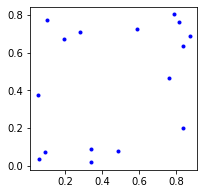

1.0609594476597387e+37


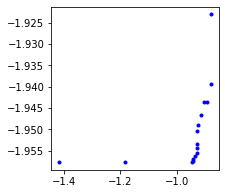

In [27]:
#call an instance of the class
obj = simulation()

obj.set_mass(1)
obj.set_position(1)
#before minimising PE
obj.plot_configuration()

obj.calc_forces(1)

obj.minimise_pe(1)
#after minimising PE
obj.plot_configuration()